# Demand Forecasting

## Can you forecast the demand of the car rentals on an hourly basis?

Problem Statement

ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 

# Objective

The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.

Data Dictionary

You are provided with 3 files - train.csv, test.csv and sample_submission.csv

Training set

train.csv contains the hourly demand of car rentals from August 2018 to February 2021.


# import libraries


In [245]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')



In [262]:
train = pd.read_csv("train_E1GspfA.csv")
test = pd.read_csv("test_6QvDdzb.csv")

In [263]:
# train_original = train.copy()
# test_original = test.copy()

## Missing value check

In [264]:
train.isna().sum().sum()

0

In [265]:
test.isna().sum().sum()

0

In [266]:


train.columns, test.columns



(Index(['date', 'hour', 'demand'], dtype='object'),
 Index(['date', 'hour'], dtype='object'))

In [267]:


train.dtypes,test.dtypes



(date      object
 hour       int64
 demand     int64
 dtype: object,
 date    object
 hour     int64
 dtype: object)

In [268]:


train.shape, test.shape



((18247, 3), (7650, 2))

# Extract Features from Time

In [269]:
train.set_index('hour', inplace=True)

train['datetime_dtype'] = pd.to_datetime(train.index, format='%H', exact=False)

train['str_dtype'] = train['datetime_dtype'].astype(str).str[11:16]

In [270]:
train['Date'] = train['date'].astype(str)

train['Datetime'] = pd.to_datetime(train.date+' '+train.str_dtype)

In [271]:
train

,date,demand,datetime_dtype,str_dtype,Date,Datetime
hour,,,,,,
9,2018-08-18,91,1900-01-01 09:00:00,09:00,2018-08-18,2018-08-18 09:00:00
10,2018-08-18,21,1900-01-01 10:00:00,10:00,2018-08-18,2018-08-18 10:00:00
13,2018-08-18,23,1900-01-01 13:00:00,13:00,2018-08-18,2018-08-18 13:00:00
14,2018-08-18,104,1900-01-01 14:00:00,14:00,2018-08-18,2018-08-18 14:00:00
15,2018-08-18,81,1900-01-01 15:00:00,15:00,2018-08-18,2018-08-18 15:00:00
...,...,...,...,...,...,...
19,2021-02-28,95,1900-01-01 19:00:00,19:00,2021-02-28,2021-02-28 19:00:00
20,2021-02-28,88,1900-01-01 20:00:00,20:00,2021-02-28,2021-02-28 20:00:00
21,2021-02-28,39,1900-01-01 21:00:00,21:00,2021-02-28,2021-02-28 21:00:00


In [272]:
test.set_index('hour', inplace=True)

test['datetime_dtype'] = pd.to_datetime(test.index, format='%H', exact=False)

test['str_dtype'] = test['datetime_dtype'].astype(str).str[11:16]


test['Date'] = test['date'].astype(str)

test['Datetime'] = pd.to_datetime(test.date+' '+test.str_dtype)

In [273]:
train_original = train.copy()
test_original = test.copy()

In [274]:


train['Datetime'] = pd.to_datetime(train.Datetime, format = '%Y-%m-%d %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%Y-%m-%d %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%Y-%m-%d %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%Y-%m-%d %H:%M')



In [275]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [276]:


train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']



In [277]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

No handles with labels found to put in legend.


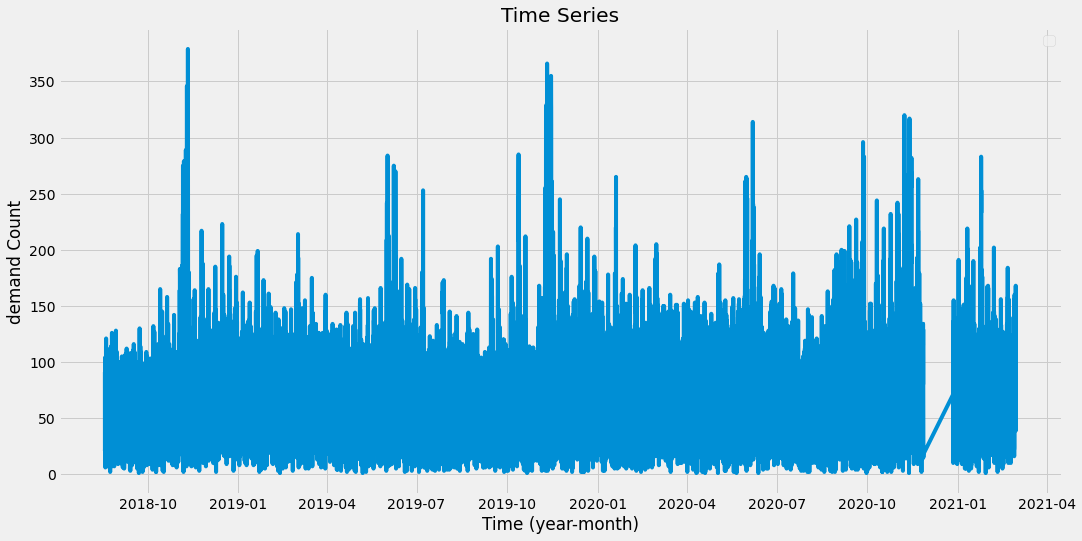

In [278]:


train.index = train['Datetime']
df = train.drop('datetime_dtype',1)
ts = df['demand']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("demand Count")
plt.legend(loc = 'best')



<AxesSubplot:xlabel='year'>

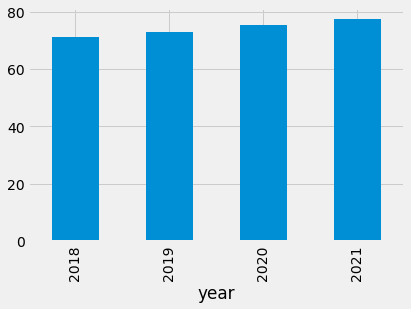

In [279]:
#eda
train.groupby('year')['demand'].mean().plot.bar()

In [280]:
#demand is clearly increasing year by year with rising population in banaglore and much dependence on rental cars



<AxesSubplot:title={'center':'demand Count(Monthwise)'}, xlabel='year,month'>

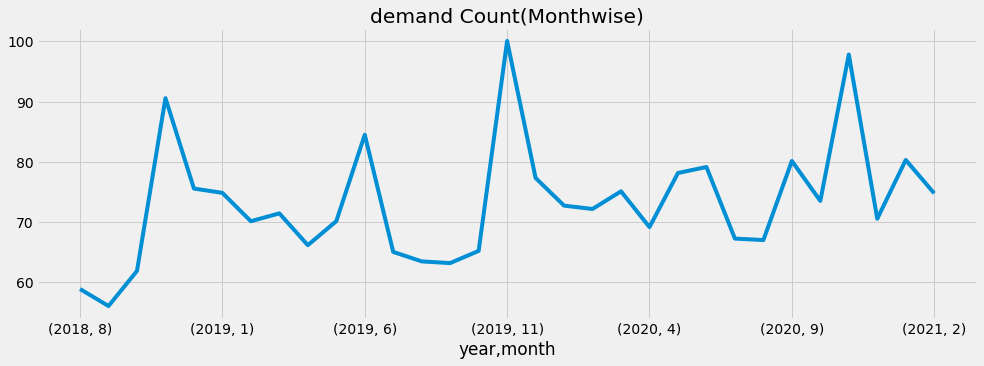

In [281]:
temp = train.groupby(['year', 'month'])['demand'].mean()
temp.plot(figsize =(15,5), title = "demand Count(Monthwise)", fontsize = 14)

<AxesSubplot:xlabel='day'>

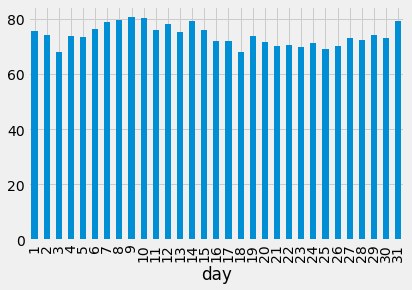

In [282]:
train.groupby('day') ['demand'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

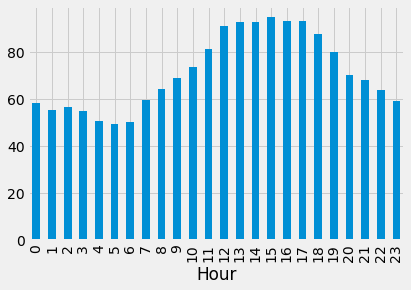

In [283]:
# 
train.groupby('Hour')['demand'].mean().plot.bar()



# Clearly from morning 7am to 12pm demand is increasing ,after 8pm the demand start decreasing

<AxesSubplot:xlabel='weekend'>

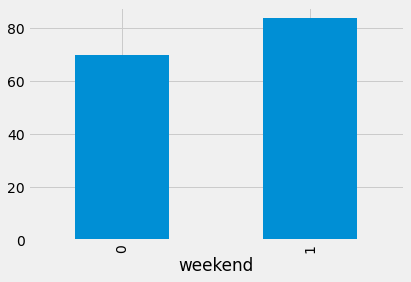

In [284]:


train.groupby('weekend') ['demand'].mean().plot.bar()



<AxesSubplot:xlabel='Day of week'>

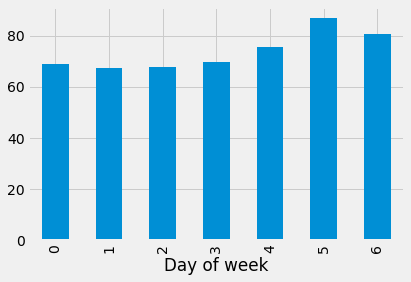

In [285]:
train.groupby('Day of week') ['demand'].mean().plot.bar()

In [286]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%Y-%m-%d %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()


<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

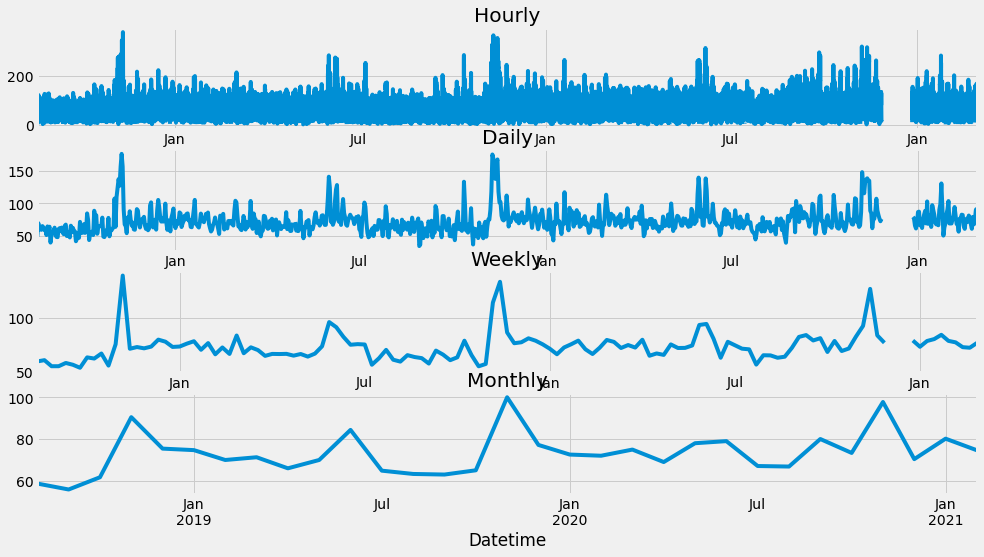

In [287]:
fig,axs = plt.subplots(4,1)

hourly.demand.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.demand.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.demand.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.demand.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [288]:


test.Timestamp = pd.to_datetime(test.Datetime, format='%Y-%m-%d %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%Y-%m-%d %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()



In [289]:
test.isna().sum().sum()

124

In [290]:
test = test.fillna(test.mean())

In [291]:
train.isna().sum().sum()

217

In [292]:
train = train.fillna(train.mean())

# 

Divide data into training and validation


In [293]:
Train = train.loc['2018-10-18':'2020-10-18']
valid = train.loc['2020-10-19':'2021-02-28']

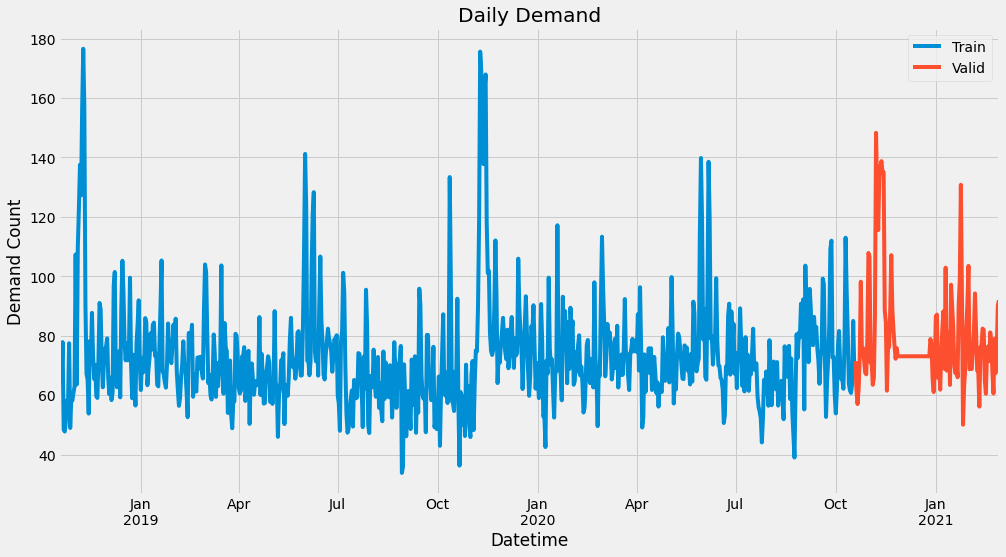

In [294]:
Train.demand.plot(figsize = (15,8), title = 'Demand', fontsize = 14, label = 'Train')
valid.demand.plot(figsize = (15,8), title = 'Daily Demand', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Demand Count')
plt.legend(loc = 'best')

# Naive Forecasting

Text(0.5, 1.0, 'Naive Forecast')

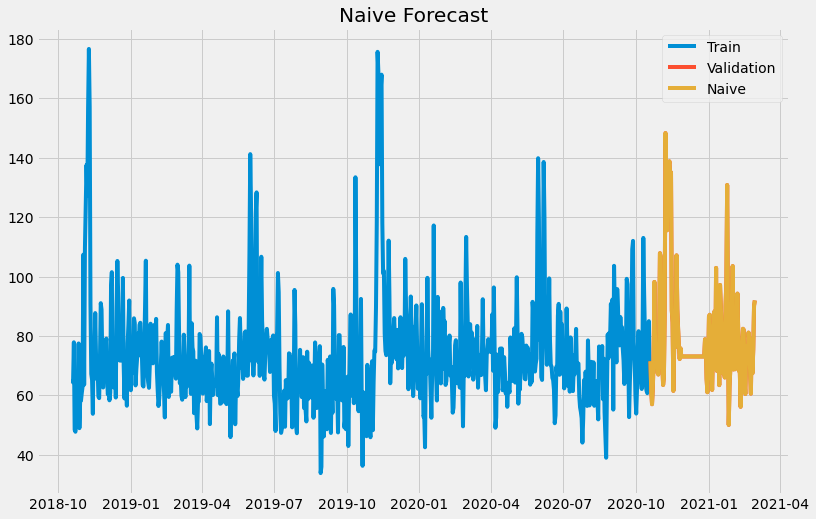

In [295]:
dd = np.asarray(Train.demand)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['demand'],label = 'Train')
plt.plot(valid.index, valid['demand'], label = 'Validation')
plt.plot(y_hat.index, y_hat['demand'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [296]:
y_hat

,demand,year,month,day,Hour,Day of week,weekend,naive
Datetime,,,,,,,,
2020-10-19,71.500000,2020.0,10.0,19.0,12.181818,0.0,0.0,68.681818
2020-10-20,61.684211,2020.0,10.0,20.0,11.684211,1.0,0.0,68.681818
2020-10-21,57.055556,2020.0,10.0,21.0,13.277778,2.0,0.0,68.681818
2020-10-22,62.142857,2020.0,10.0,22.0,12.714286,3.0,0.0,68.681818
2020-10-23,72.652174,2020.0,10.0,23.0,11.782609,4.0,0.0,68.681818
...,...,...,...,...,...,...,...,...
2021-02-24,79.000000,2021.0,2.0,24.0,12.666667,2.0,0.0,68.681818
2021-02-25,67.476190,2021.0,2.0,25.0,12.714286,3.0,0.0,68.681818
2021-02-26,75.500000,2021.0,2.0,26.0,11.500000,4.0,0.0,68.681818


# 

Calculate RMS Error for Naive Approach


In [297]:
y_hat.isna().sum().sum()

0

In [299]:
valid['demand'].isna().sum().sum()

0

In [301]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.demand, y_hat.naive))
rmse



21.094479259138662

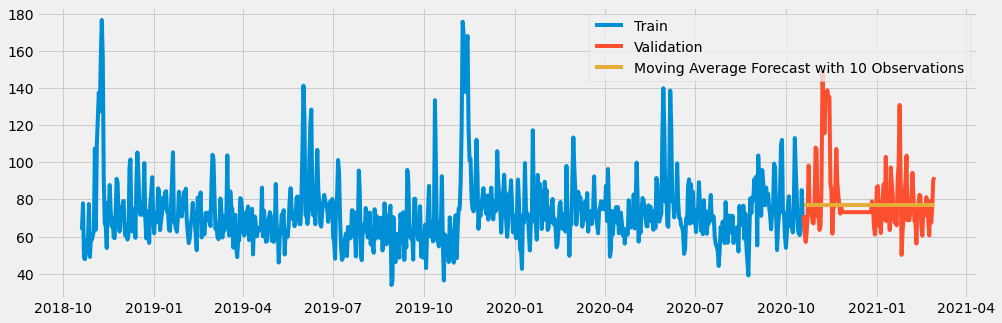

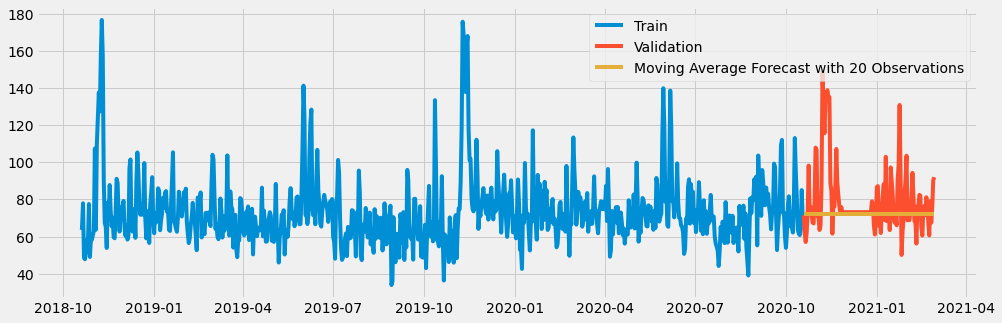

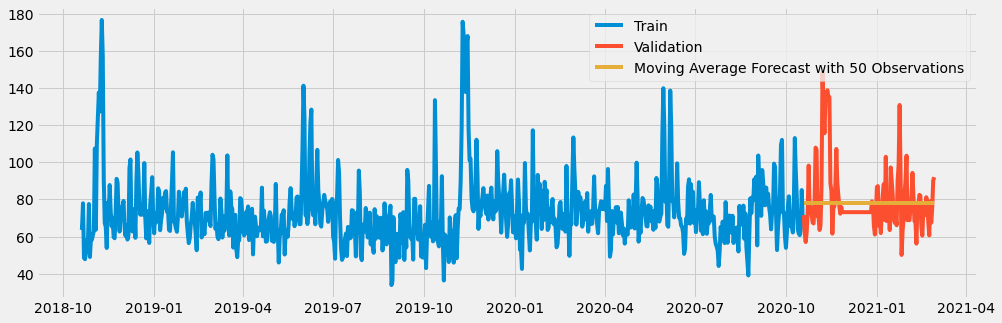

In [302]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['demand'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['demand'], label = 'Train')
plt.plot(valid['demand'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['demand'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['demand'], label = 'Train')
plt.plot(valid['demand'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['demand'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['demand'], label = 'Train')
plt.plot(valid['demand'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

## RMS Error for Moving Average


In [303]:


rmse = sqrt(mean_squared_error(valid['demand'], y_hat_avg['moving_average_forecast']))
rmse



18.047863102383147

# Simple Exponential Smoothing

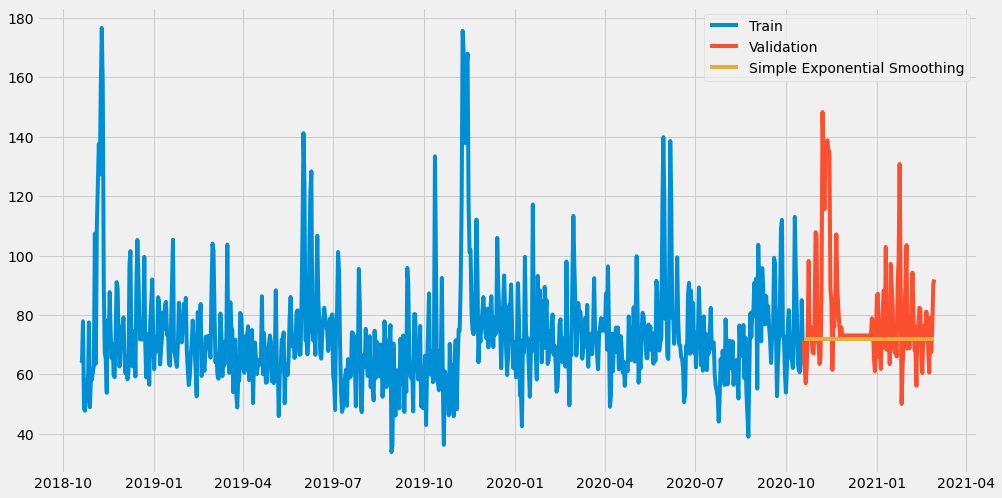

In [304]:


from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['demand'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['demand'], label = 'Train')
plt.plot(valid['demand'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')



In [305]:
# y_hat['SES'] = y_hat['SES'].fillna(y_hat['SES'].mean())

In [306]:
rmse = sqrt(mean_squared_error(valid.demand, y_hat['SES']))
rmse

19.64746950102137

# Holt's Linear Trend Model

<Figure size 1600x800 with 0 Axes>

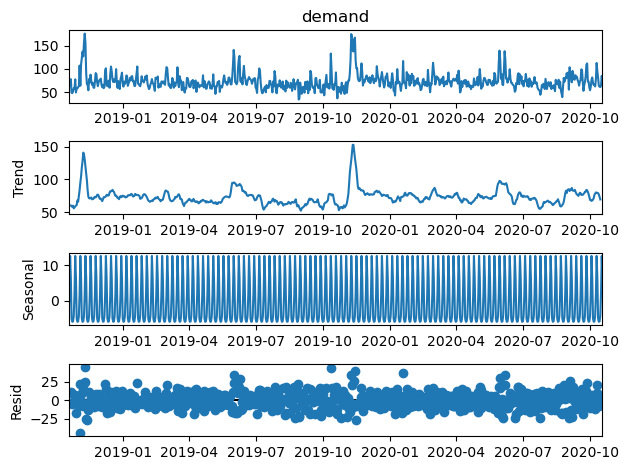

In [307]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.demand).plot()
result = sm.tsa.stattools.adfuller(train.demand)
plt.show()

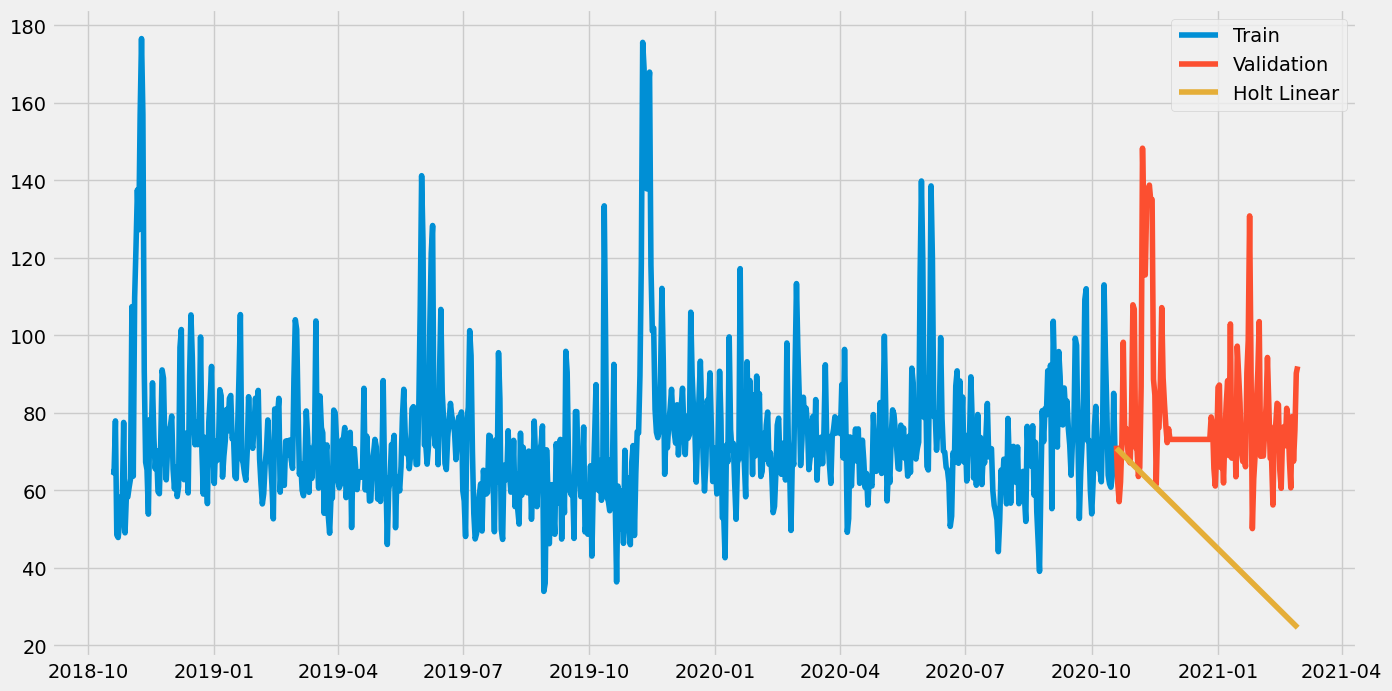

In [308]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['demand'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.demand, label = 'Train')
plt.plot(valid.demand, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [309]:
rmse = sqrt(mean_squared_error(valid.demand, y_hat_holt.Holt_linear))
rmse

37.92433289592382

# Make Predictions on test set

In [310]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [311]:
#Calculating hourly ration of count
train_original['ratio'] = train_original['demand']/train_original['demand'].sum()

#Grouping hourly ratio
temp = train_original.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby.csv')
temp2 = pd.read_csv("Groupby.csv")
temp2 =temp2.drop('Hour.1',1)
#Merge test and test_original on day, month and year
merge = pd.merge(test, test_original, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

#Predicting by merging temp2 and merge
prediction = pd.merge(merge, temp2, on = 'Hour',how = 'left')

#Converting the ration to original scale
prediction['demand'] = prediction['prediction'] * prediction['ratio'] * 24
# prediction['datetime_dtype'] = prediction['ID_y']
prediction.head()

,prediction,date,datetime_dtype,str_dtype,Date,Hour,ratio,demand
0,70.820972,2021-03-01,1900-01-01 00:00:00,00:00,2021-03-01,0.0,0.031251,53.116594
1,70.820972,2021-03-01,1900-01-01 01:00:00,01:00,2021-03-01,1.0,0.023930,40.673372
2,70.820972,2021-03-01,1900-01-01 02:00:00,02:00,2021-03-01,2.0,0.023119,39.294849
3,70.820972,2021-03-01,1900-01-01 03:00:00,03:00,2021-03-01,3.0,0.011669,19.833116
4,70.820972,2021-03-01,1900-01-01 05:00:00,05:00,2021-03-01,5.0,0.012291,20.891872


In [312]:
submission = prediction.drop(['datetime_dtype','str_dtype','prediction','ratio'], axis =1)
pd.DataFrame(submission, columns = ['date','Hour','demand']).to_csv('Holt_Linear.csv')

## Holt Winter's Model'


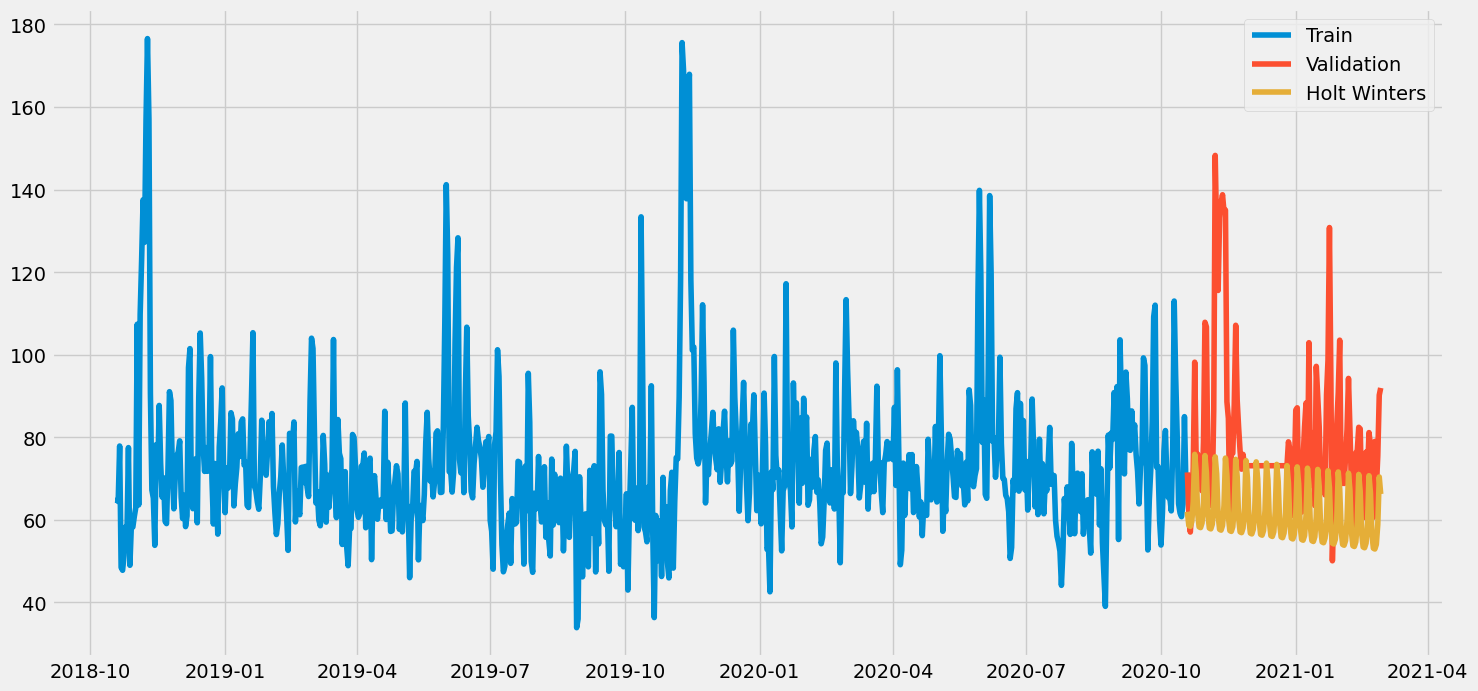

In [313]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['demand']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['demand'], label = 'Train')
plt.plot(valid['demand'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [314]:


rmse = sqrt(mean_squared_error(valid['demand'], y_hat_avg['Holt_Winter']))
rmse



24.27371953043973

# Apply Holt Winter's on test data

In [316]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [317]:
#Merge test and test_original on day,month and year
merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

#Predicting by merge and temp2
prediction = pd.merge(merge, temp2 , on = 'Hour', how = 'left')

#Converting the ration to original scale
prediction['demand'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

,day,prediction,date,datetime_dtype,str_dtype,Date,Hour,ratio,demand
0,1.0,61.965341,2021-03-01,1900-01-01 00:00:00,00:00,2021-03-01,0.0,0.031251,46.474763
1,1.0,61.965341,2021-03-01,1900-01-01 01:00:00,01:00,2021-03-01,1.0,0.023930,35.587472
2,1.0,61.965341,2021-03-01,1900-01-01 02:00:00,02:00,2021-03-01,2.0,0.023119,34.381323
3,1.0,61.965341,2021-03-01,1900-01-01 03:00:00,03:00,2021-03-01,3.0,0.011669,17.353134
4,1.0,61.965341,2021-03-01,1900-01-01 05:00:00,05:00,2021-03-01,5.0,0.012291,18.279501


In [318]:


# prediction['ID']= prediction['ID_y']
submission = prediction.drop(['datetime_dtype','str_dtype','day','prediction','ratio'], axis =1)

pd.DataFrame(submission, columns = ['date','Hour','demand']).to_csv('Holt winters.csv')



# Arima Model 

In [319]:


from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
#     rolmean = pd.rolling_mean(timeseries,window = 24)
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd=pd.Series(timeseries).rolling(window=24).std()
#     rolstd = pd.rolling_std(timeseries, window = 24)
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)



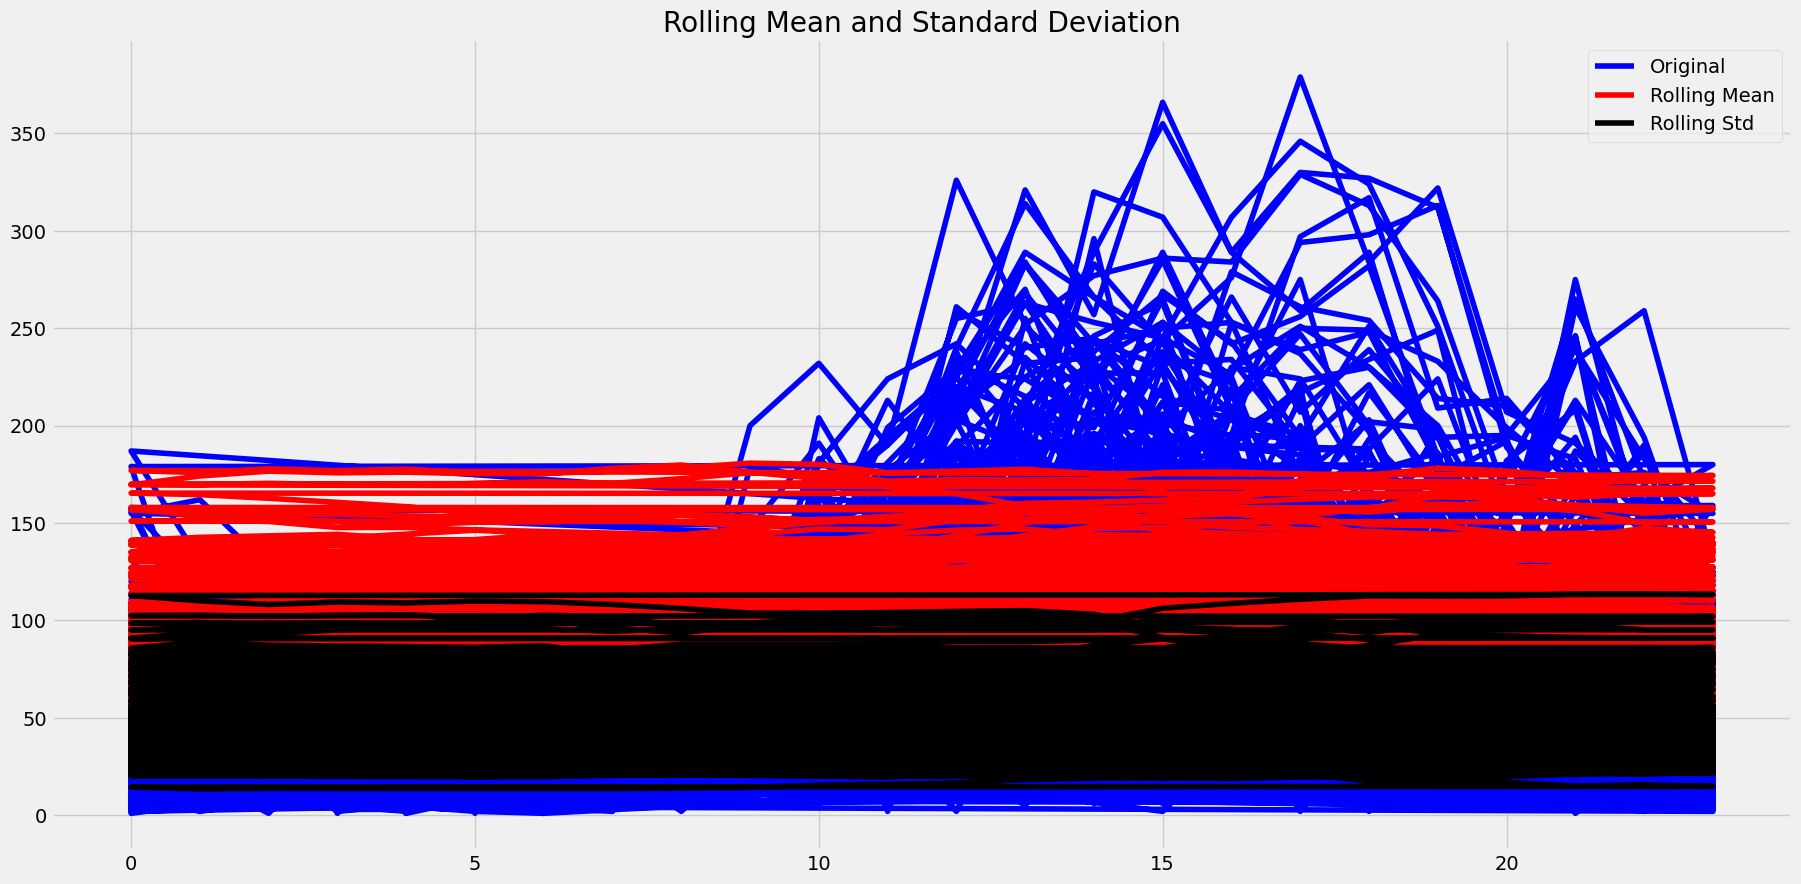

Results of Dickey Fuller test: 
Test Statistics               -1.254362e+01
p-value                        2.285775e-23
# Lag Used                     2.200000e+01
Number of Observations Used    1.822400e+04
Critical Value (1%)           -3.430709e+00
Critical Value (5%)           -2.861699e+00
Critical Value (10%)          -2.566854e+00
dtype: float64


In [320]:


from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['demand'])



In [321]:


Train_log = np.log(Train['demand'])
valid_log = np.log(valid['demand'])



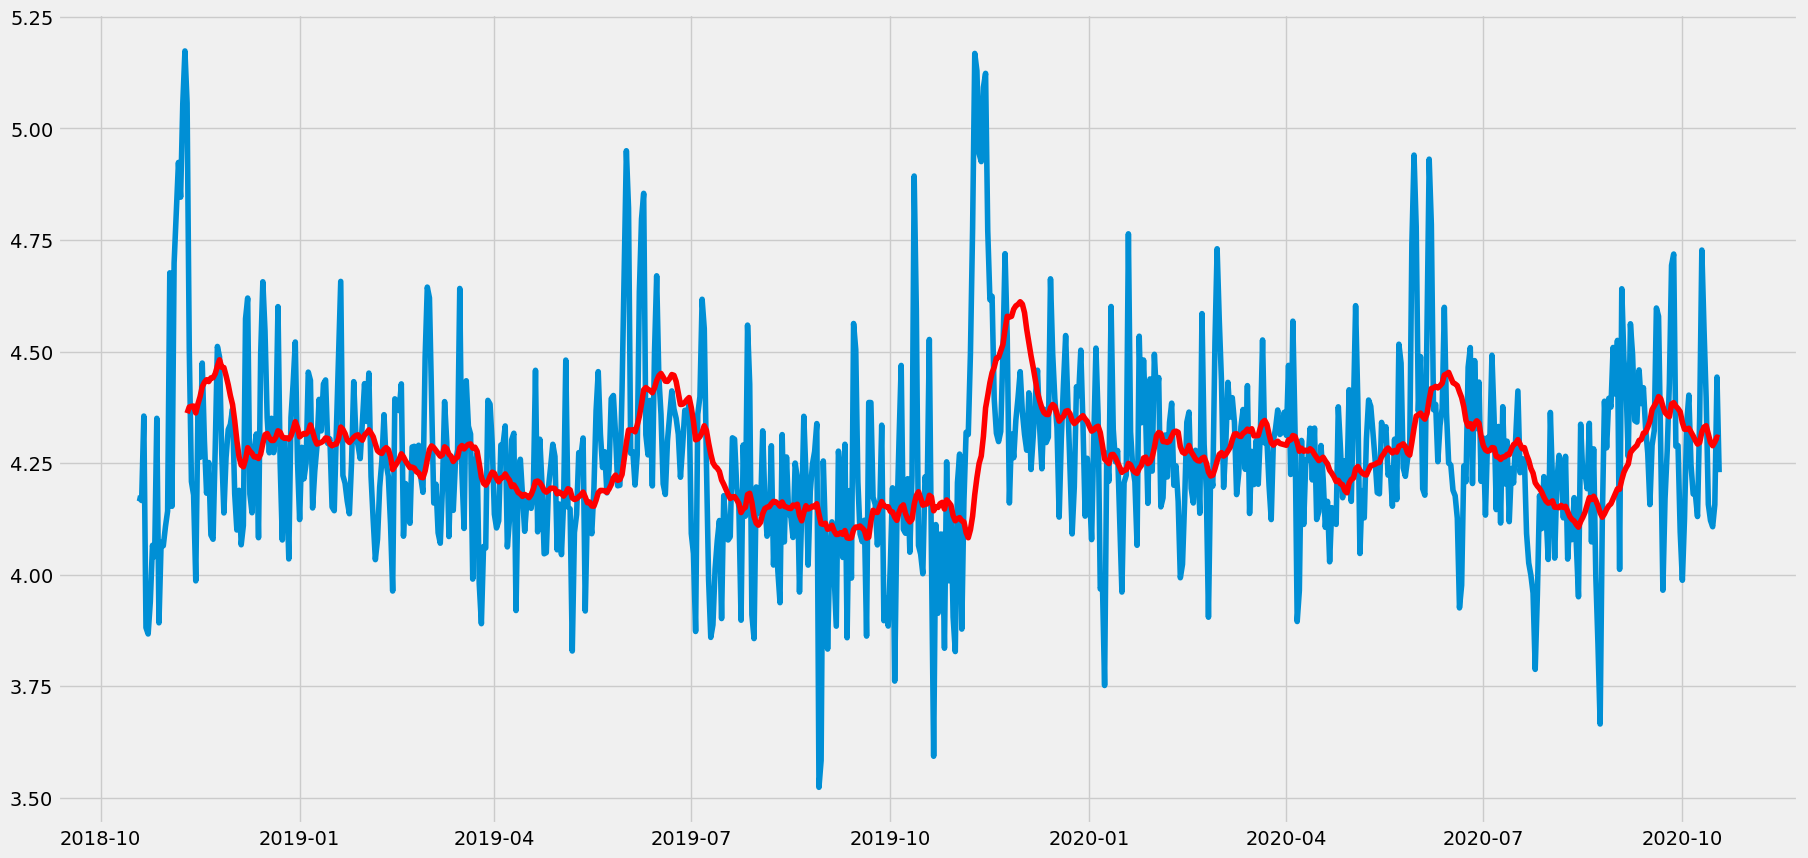

In [322]:
# moving_avg = pd.rolling_mean(Train_log,24)
moving_avg = pd.Series(Train_log).rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

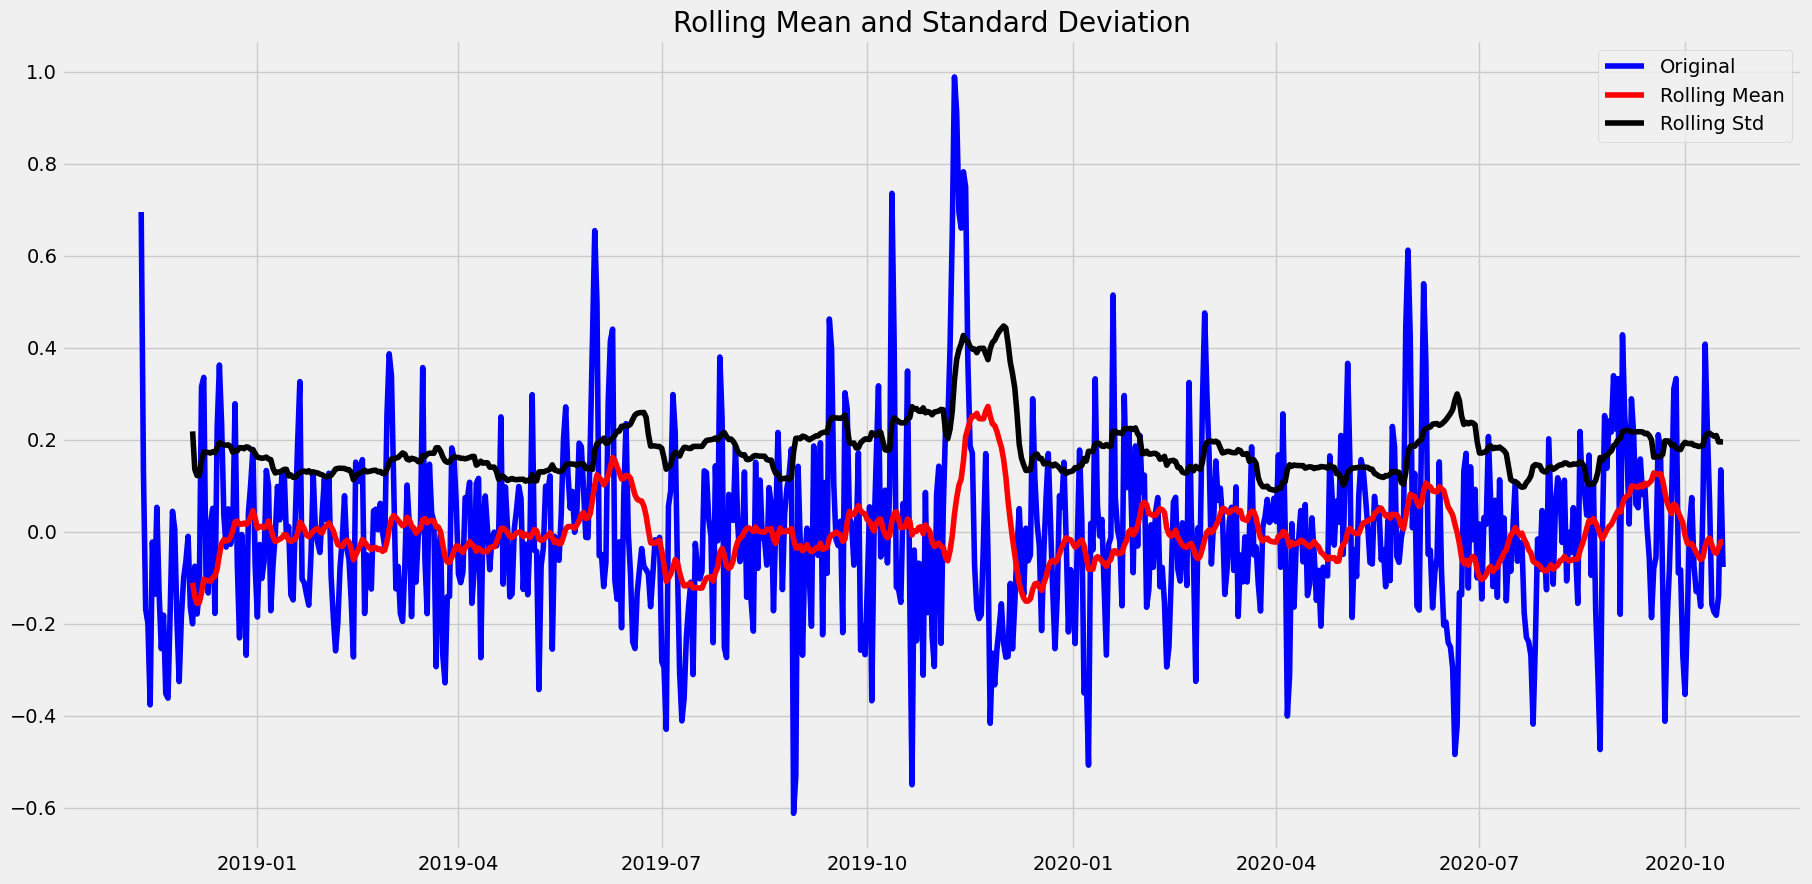

Results of Dickey Fuller test: 
Test Statistics               -7.049338e+00
p-value                        5.578975e-10
# Lag Used                     1.900000e+01
Number of Observations Used    6.890000e+02
Critical Value (1%)           -3.439877e+00
Critical Value (5%)           -2.865744e+00
Critical Value (10%)          -2.569009e+00
dtype: float64


In [323]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

# 
# Differncing can help to make series stable and eliminate trend


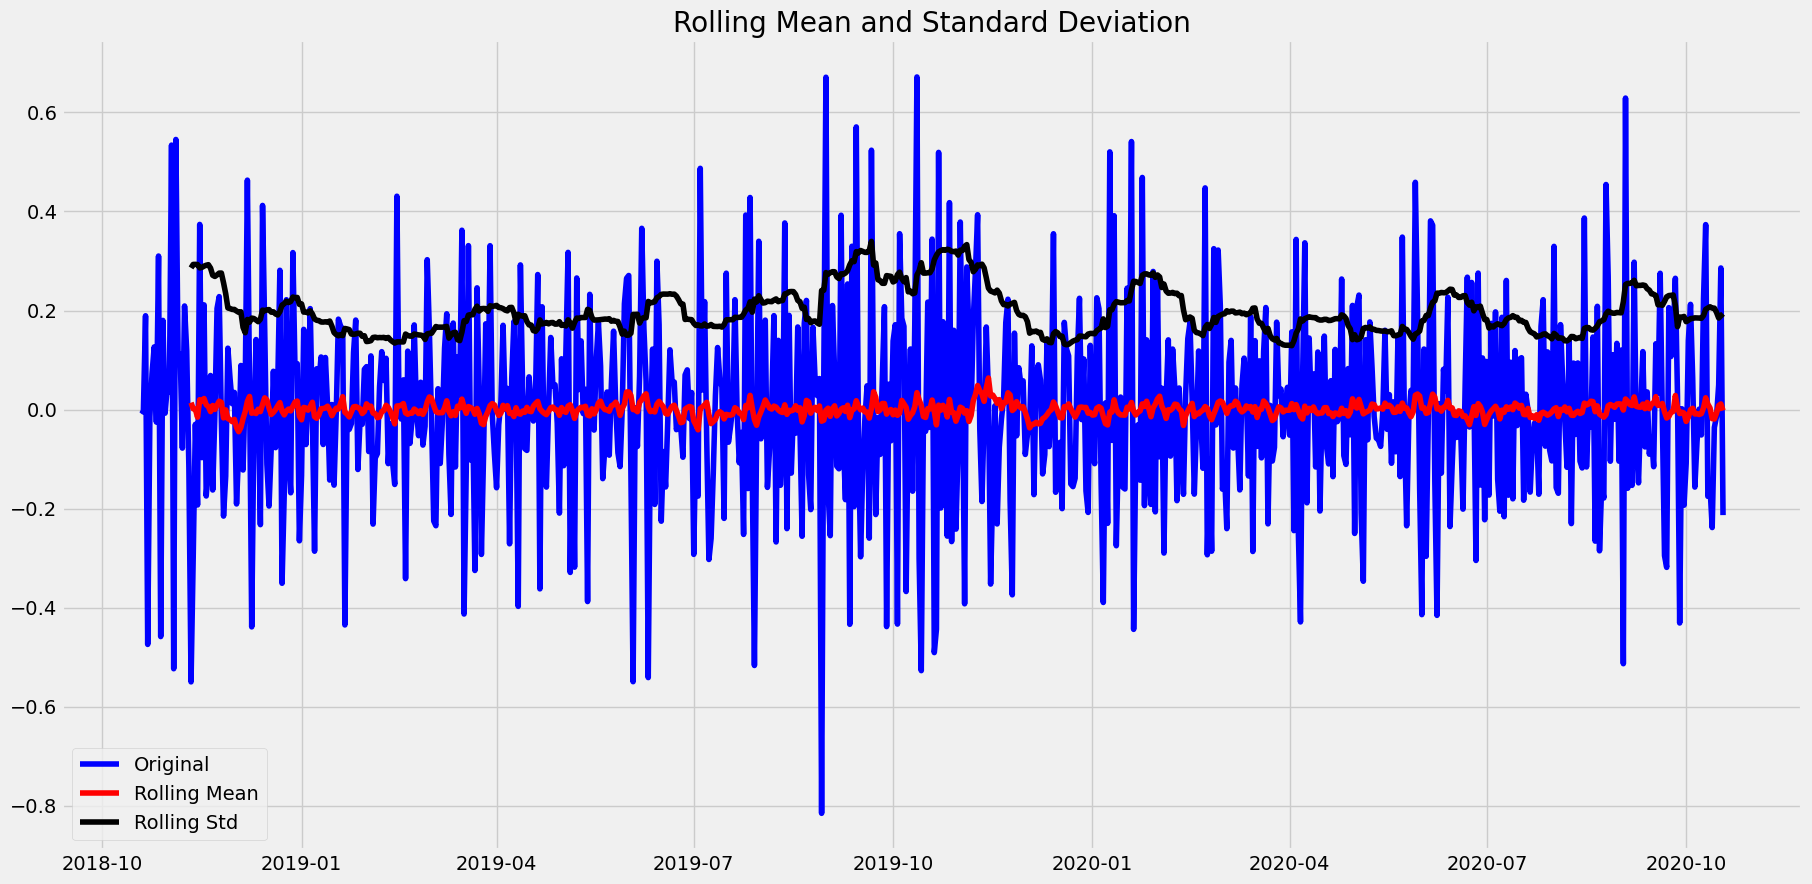

Results of Dickey Fuller test: 
Test Statistics               -1.062278e+01
p-value                        5.461151e-19
# Lag Used                     1.900000e+01
Number of Observations Used    7.110000e+02
Critical Value (1%)           -3.439581e+00
Critical Value (5%)           -2.865614e+00
Critical Value (10%)          -2.568939e+00
dtype: float64


In [324]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

# Removing Seasonailty

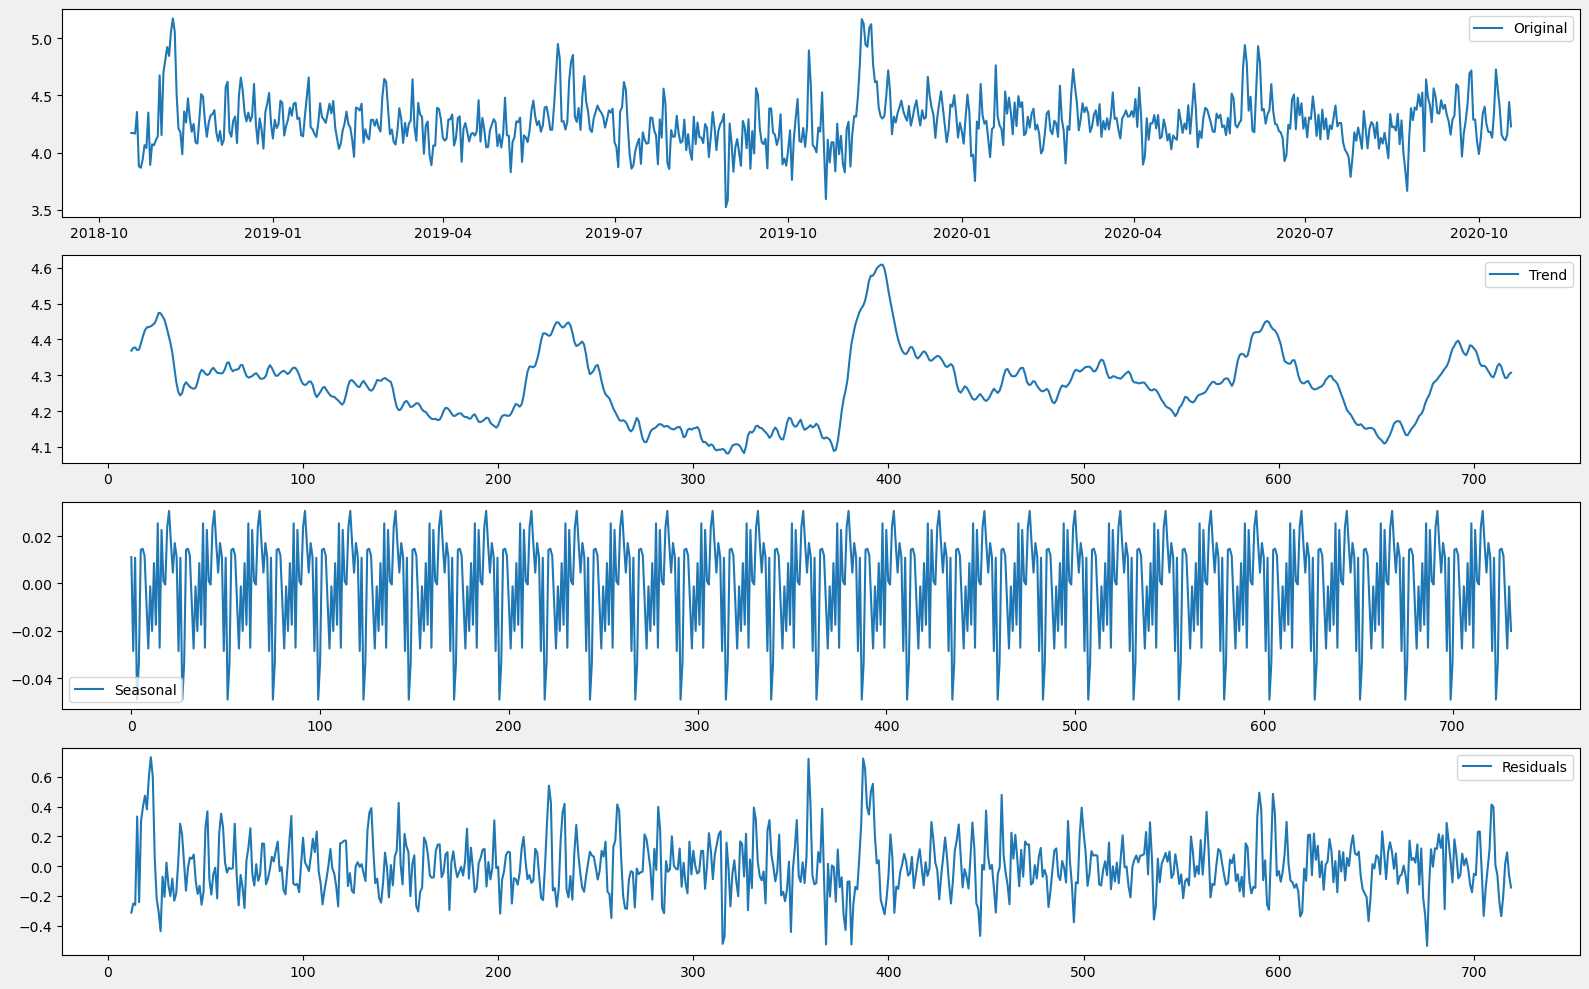

In [325]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).demand.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

# 
# Let's check stationarity of residuals


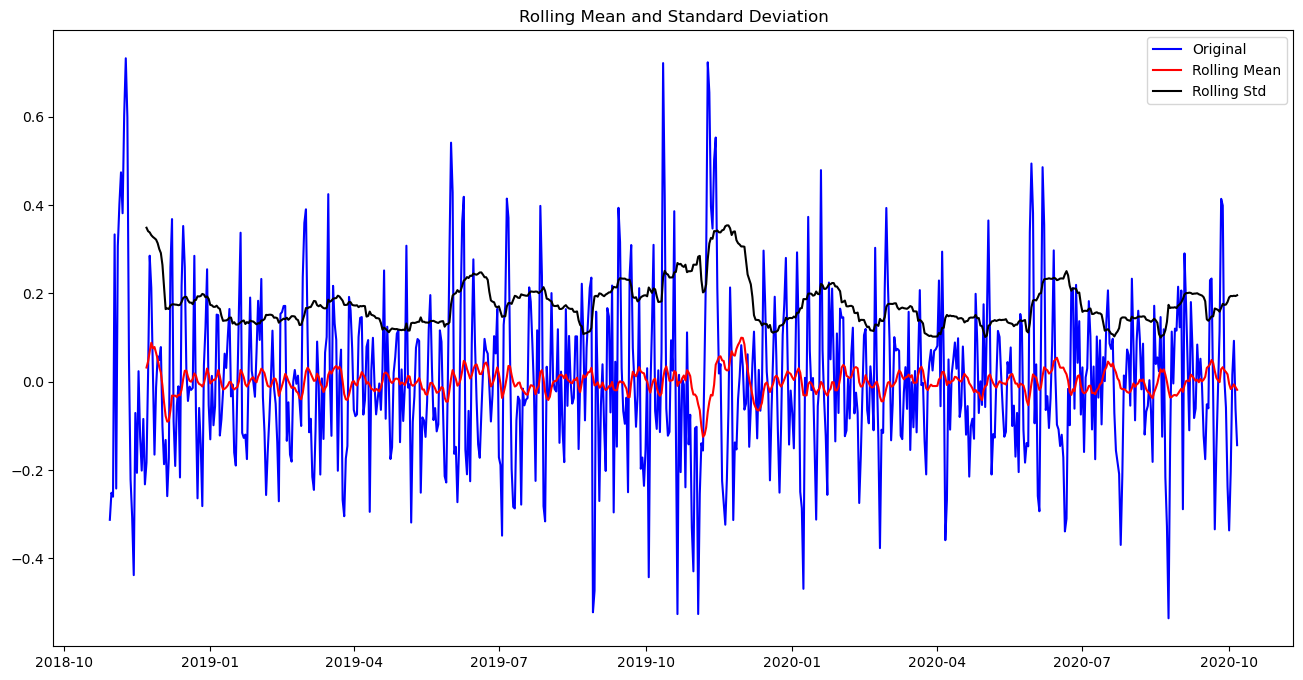

Results of Dickey Fuller test: 
Test Statistics               -1.016888e+01
p-value                        7.177166e-18
# Lag Used                     1.800000e+01
Number of Observations Used    6.890000e+02
Critical Value (1%)           -3.439877e+00
Critical Value (5%)           -2.865744e+00
Critical Value (10%)          -2.569009e+00
dtype: float64


In [327]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [328]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

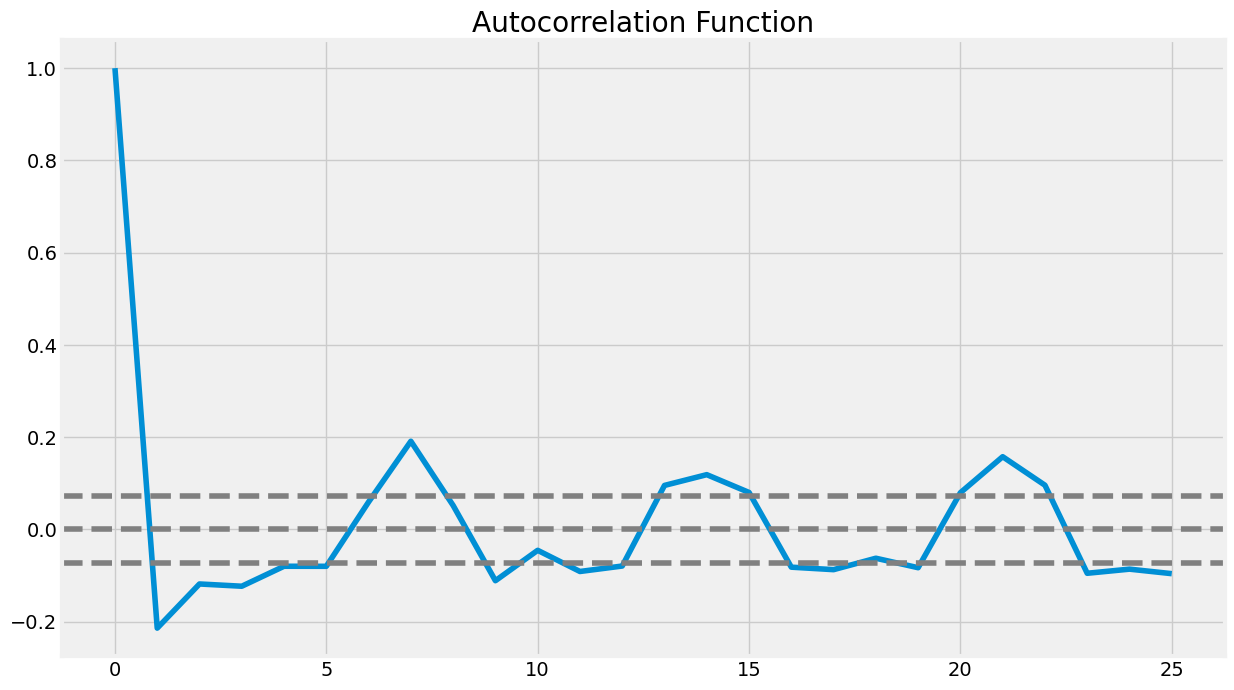

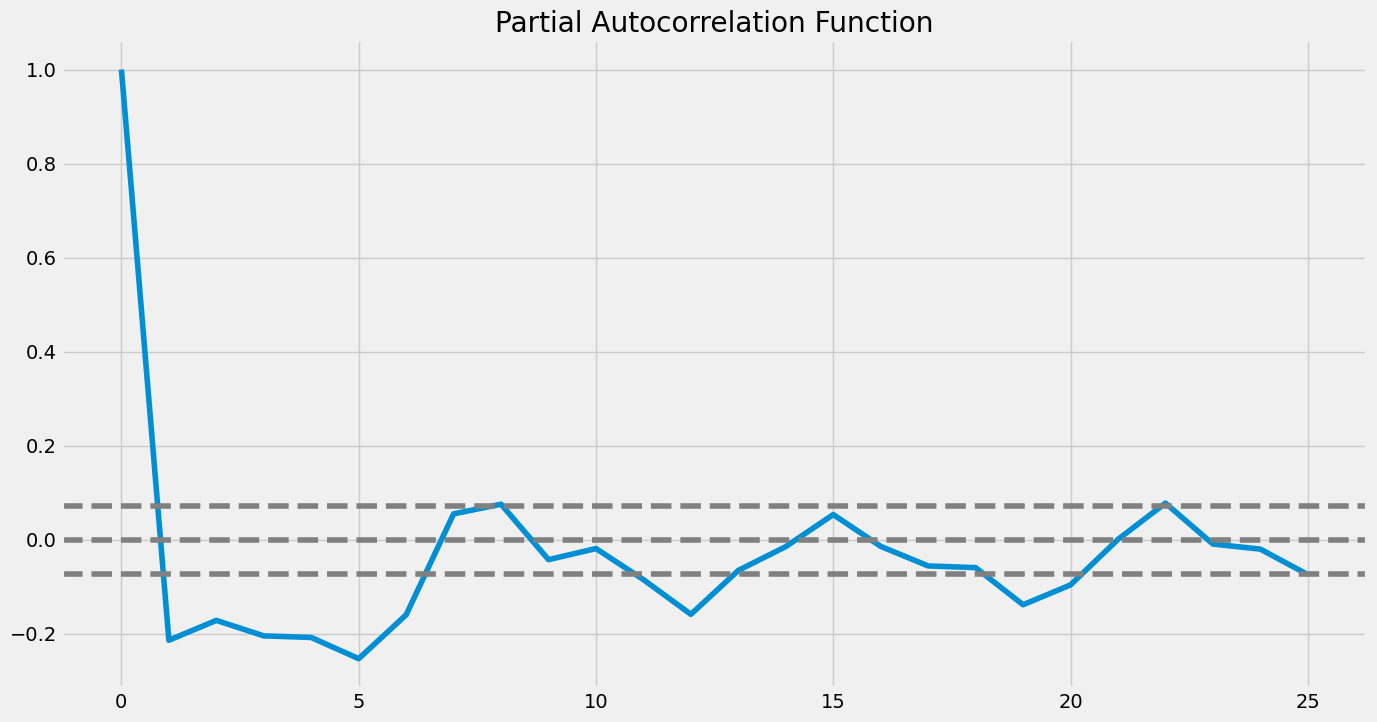

In [329]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

# 
AR Model


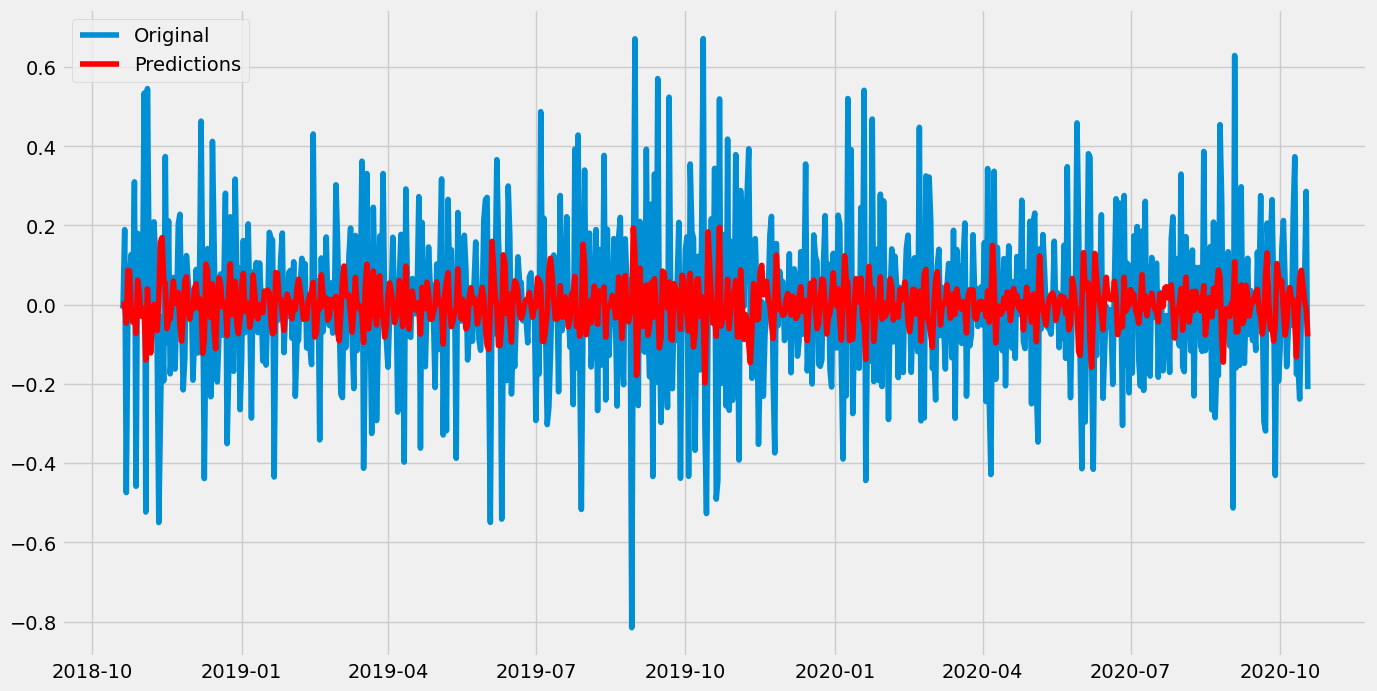

In [330]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [331]:


AR_predict = results_AR.predict(start="2019-03-01", end="2019-06-01")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['demand'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)



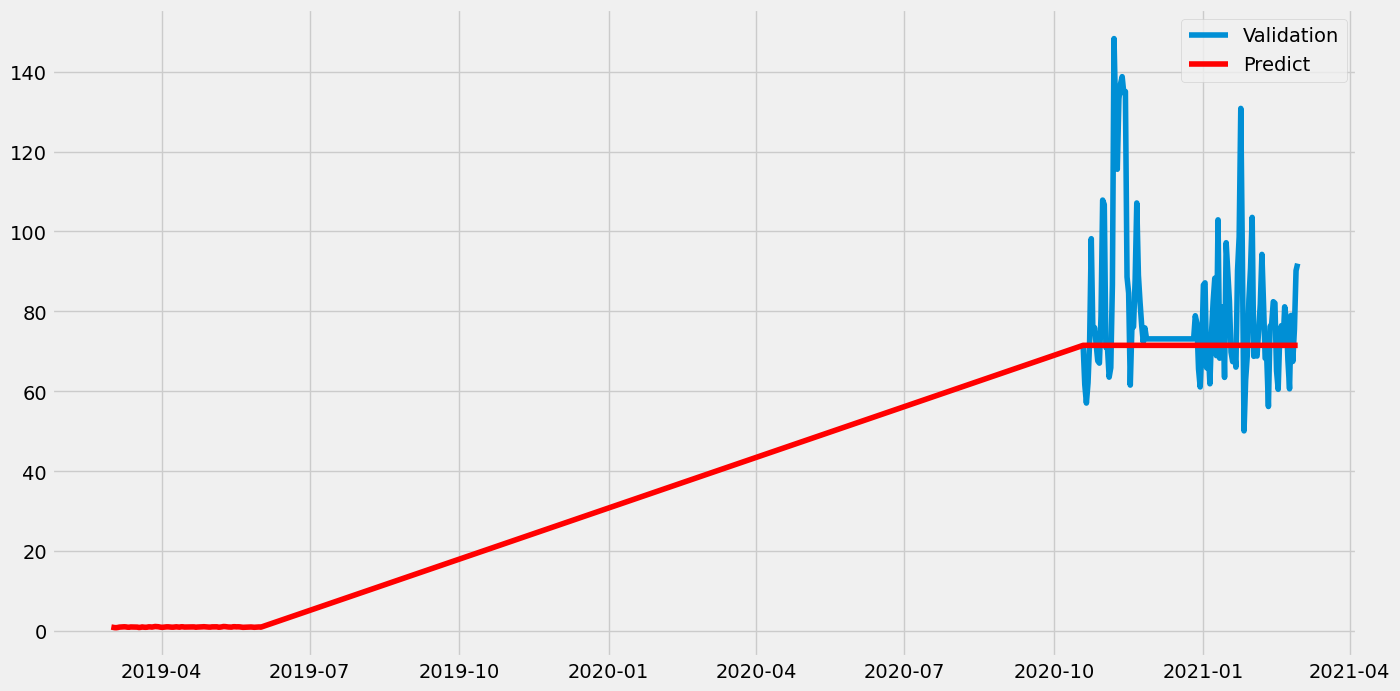

In [332]:
plt.figure(figsize = (15,8))
plt.plot(valid['demand'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
# plt.title('RMSE: %.4f'% np.squeeze(np.sqrt(np.dot(AR_predict, valid['demand']))/valid.shape[0]))
plt.show()

# Combined Model

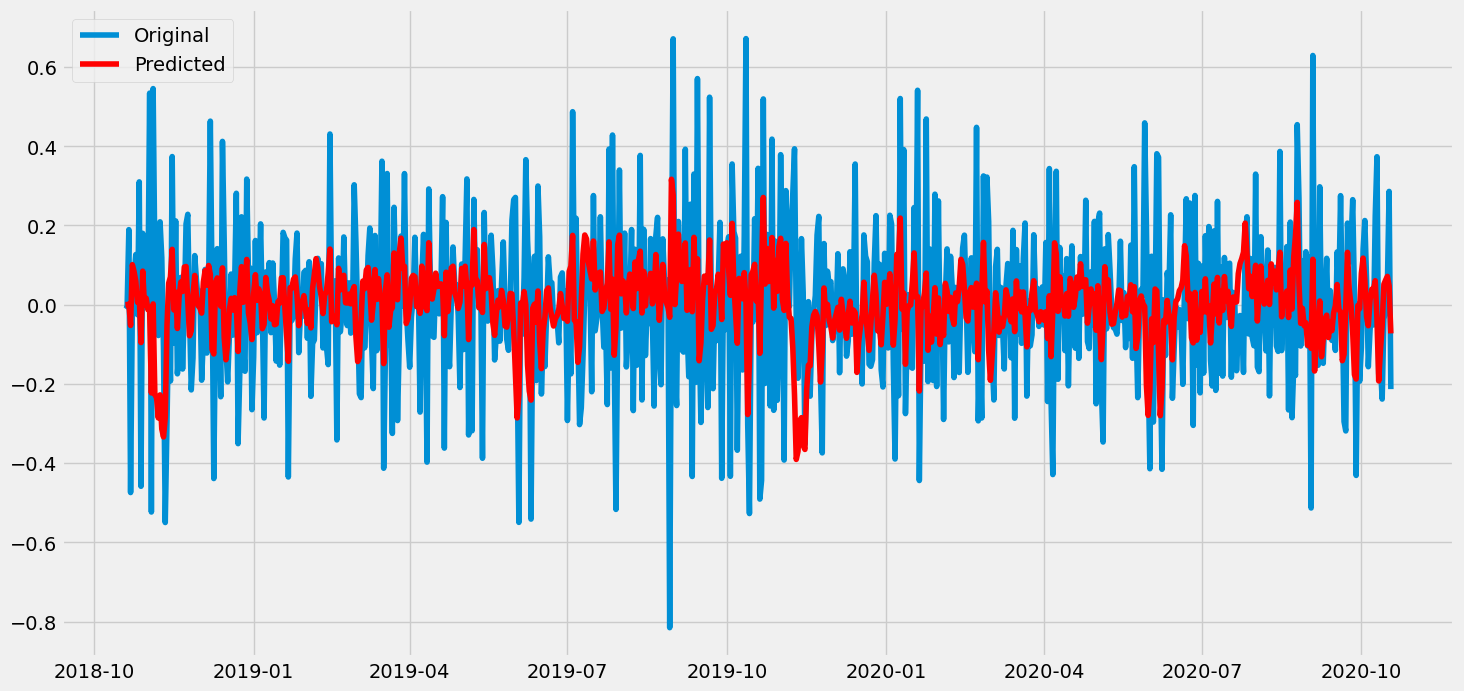

In [333]:



plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()



# function to scale model to original scale

In [334]:


def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['demand'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['demand'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['demand']))/given_set.shape[0]))
    plt.show()



In [335]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['demand'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
#     plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['demand']))/given_set.shape[0]))
    plt.show()

In [336]:


ARIMA_predict_diff=results_ARIMA.predict(start="2019-06-25", end="2019-09-25")



In [338]:
ARIMA_predict_diff.isna().sum().sum()

0

In [339]:
valid.isna().sum().sum()

0

In [353]:
# plt.figure(figsize = (16,8))
# check_prediction_diff(ARIMA_predict_diff, valid)

# SARIMAX Model

In [341]:


import statsmodels.api as sm



In [342]:
valid.copy().isna().sum().sum()

0

Text(0.5, 1.0, 'SARIMAX Model')

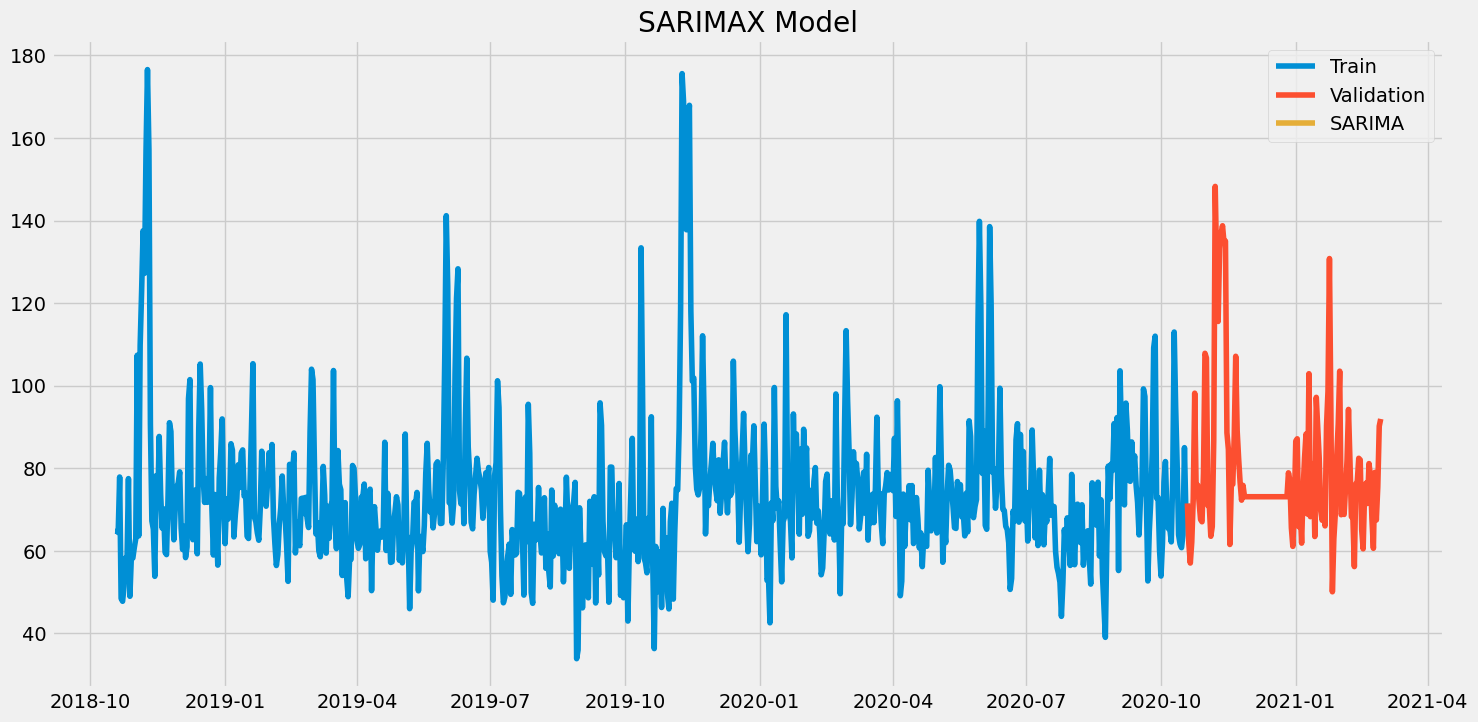

In [343]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.demand, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2018-10-18", end="2020-10-18", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['demand'], label = "Train")
plt.plot(valid.demand, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [344]:
y_hat_avg.isna().sum().sum()

133

In [345]:
y_hat_avg.fillna(y_hat_avg.mean())

,demand,year,month,day,Hour,Day of week,weekend,SARIMA
Datetime,,,,,,,,
2020-10-19,71.500000,2020.0,10.0,19.0,12.181818,0.0,0.0,NaN
2020-10-20,61.684211,2020.0,10.0,20.0,11.684211,1.0,0.0,NaN
2020-10-21,57.055556,2020.0,10.0,21.0,13.277778,2.0,0.0,NaN
2020-10-22,62.142857,2020.0,10.0,22.0,12.714286,3.0,0.0,NaN
2020-10-23,72.652174,2020.0,10.0,23.0,11.782609,4.0,0.0,NaN
...,...,...,...,...,...,...,...,...
2021-02-24,79.000000,2021.0,2.0,24.0,12.666667,2.0,0.0,NaN
2021-02-25,67.476190,2021.0,2.0,25.0,12.714286,3.0,0.0,NaN
2021-02-26,75.500000,2021.0,2.0,26.0,11.500000,4.0,0.0,NaN


In [238]:
y_hat_avg.isna().sum()

demand           0
year             0
month            0
day              0
Hour             0
Day of week      0
weekend          0
SARIMA         133
dtype: int64

In [230]:
valid['demand'].isna().sum().sum()

0

In [346]:


# rms = sqrt(mean_squared_error(valid.demand, y_hat_avg.SARIMA))
# print(rms)



In [347]:


predict = fit1.predict(start="2021-03-01", end="2022-03-01", dynamic=True)



In [348]:
test['prediction']=predict

In [349]:


#Merge test and test_original on day,month and year
merge = pd.merge(test,test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['demand'] = prediction['prediction'] * prediction['ratio'] * 24



In [350]:
prediction

,year,month,day,Hour_x,prediction,date,datetime_dtype,str_dtype,Date,Datetime,Hour_y,Hour,ratio,demand
0,2021.0,3.0,1.0,11.826087,67.939161,2021-03-01,1900-01-01 00:00:00,00:00,2021-03-01,2021-03-01 00:00:00,0.0,0.0,0.031251,50.955201
1,2021.0,3.0,1.0,11.826087,67.939161,2021-03-01,1900-01-01 01:00:00,01:00,2021-03-01,2021-03-01 01:00:00,1.0,1.0,0.023930,39.018312
2,2021.0,3.0,1.0,11.826087,67.939161,2021-03-01,1900-01-01 02:00:00,02:00,2021-03-01,2021-03-01 02:00:00,2.0,2.0,0.023119,37.695883
3,2021.0,3.0,1.0,11.826087,67.939161,2021-03-01,1900-01-01 03:00:00,03:00,2021-03-01,2021-03-01 03:00:00,3.0,3.0,0.011669,19.026077
4,2021.0,3.0,1.0,11.826087,67.939161,2021-03-01,1900-01-01 05:00:00,05:00,2021-03-01,2021-03-01 05:00:00,5.0,5.0,0.012291,20.041751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676,2022.0,3.0,28.0,13.400000,NaN,2022-03-28,1900-01-01 19:00:00,19:00,2022-03-28,2022-03-28 19:00:00,19.0,19.0,0.051907,NaN
7677,2022.0,3.0,28.0,13.400000,NaN,2022-03-28,1900-01-01 20:00:00,20:00,2022-03-28,2022-03-28 20:00:00,20.0,20.0,0.044983,NaN
7678,2022.0,3.0,28.0,13.400000,NaN,2022-03-28,1900-01-01 21:00:00,21:00,2022-03-28,2022-03-28 21:00:00,21.0,21.0,0.043155,NaN
7679,2022.0,3.0,28.0,13.400000,NaN,2022-03-28,1900-01-01 22:00:00,22:00,2022-03-28,2022-03-28 22:00:00,22.0,22.0,0.039427,NaN


In [351]:
prediction.columns

Index(['year', 'month', 'day', 'Hour_x', 'prediction', 'date',
       'datetime_dtype', 'str_dtype', 'Date', 'Datetime', 'Hour_y', 'Hour',
       'ratio', 'demand'],
      dtype='object')

In [352]:


# prediction['ID']=prediction['ID_y']
submission=prediction.drop(['year', 'month', 'day', 'Hour_x', 'prediction',
       'datetime_dtype', 'str_dtype', 'Date', 'Datetime', 'Hour_y', 'Hour',
       'ratio', ],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['date','Hour','demand']).to_csv('SARIMAX.csv')

